导包

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
titanic = pd.read_csv('./titanic_train.csv')

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


数据预处理,包括缺失值处理,字符串转数字

In [9]:
# 我们发现age, Cabin, Embarked存在缺失数据, Age对预测生还还有用, 而且缺的不多, 可以想办法填充
# Cabin, 缺太多, 没用了, 删掉
# EMbarked, 缺2条, 可以填充

In [10]:
# 填充Age的缺失值
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [13]:
titanic.drop(columns='Cabin', inplace=True)

In [14]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [15]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
# 私用众数去填充
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
titanic['Embarked'].fillna('S', inplace=True)

In [18]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
# 把字符串特征转化为数字
titanic['Sex'] = titanic['Sex'].map({'male':1, 'female':0})

In [21]:
titanic['Embarked'] = titanic['Embarked'].map({'S':1, 'C':0, 'Q':2})

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit_transform()

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [23]:
# EDA 探索性数据分析, exploratory data analysis
# 在训练之前探索数据的, 挖掘特征和特征之间, 或者特征和标记结果之间是否存在某些联系

In [24]:
# 看看正负样本平衡性问题
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

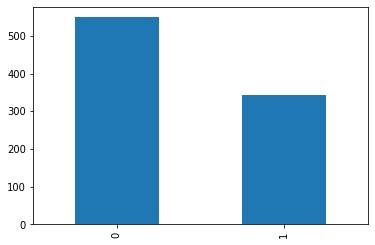

In [25]:
# 比大小, 画柱状图
titanic.Survived.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Survived'>

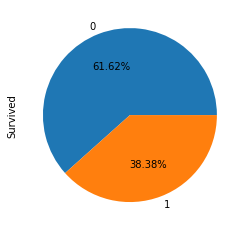

In [26]:
# 看占比, 画饼图
titanic.Survived.value_counts().plot(kind='pie', autopct='%.2f%%')

In [27]:
# 画一个热力图, 用来查看各个特征和特征之间, 特征和标记的相关性
titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.017443
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.125953
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.305762
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.022521
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.040166
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.030874
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.035957
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.268865
Embarked,-0.017443,-0.125953,0.305762,0.022521,-0.040166,0.030874,-0.035957,-0.268865,1.000000


In [28]:
# 安装seaborn
!pip install seaborn -i https://pypi.douban.com/simple/

Looking in indexes: https://pypi.douban.com/simple/


You should consider upgrading via the 'C:\Users\ause\Desktop\Python2101\2101\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [29]:
import seaborn as sns

<AxesSubplot:>

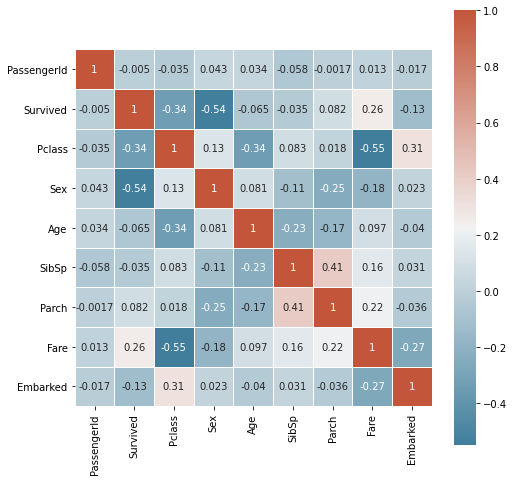

In [30]:
# 画热力图
plt.figure(figsize=(8, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(titanic.corr(), cmap=cmap, annot=True, square=True, linewidths=.5)

In [31]:
# 我们能发现,pclass和Fare有很强的负相关
# 还发现性别, Pclass, Fare和survived有很强的负相关

<AxesSubplot:>

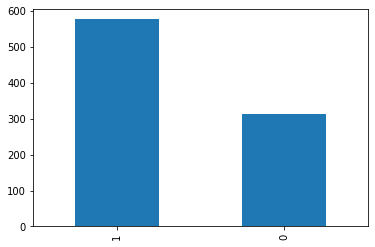

In [32]:
# 看男女性别中, 生还的情况
# 先看男女比例
titanic.Sex.value_counts().plot(kind='bar')

In [33]:
# 使用seaborn的默认风格
sns.set()

<AxesSubplot:xlabel='Sex', ylabel='count'>

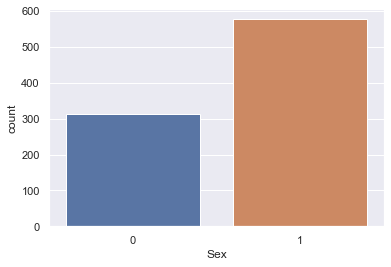

In [34]:
# 根据个数画柱状图
sns.countplot(x='Sex', data=titanic)

<AxesSubplot:xlabel='Sex', ylabel='count'>

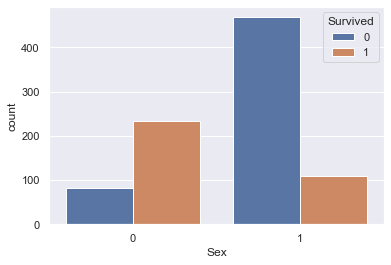

In [35]:
# 查看男女性别中各自生还的情况
sns.countplot(x='Sex', data=titanic, hue='Survived')

In [36]:
# 可以观察到, 男性中, 生还的人数很少, 女生生还人数比死亡人数多

<AxesSubplot:xlabel='Pclass', ylabel='count'>

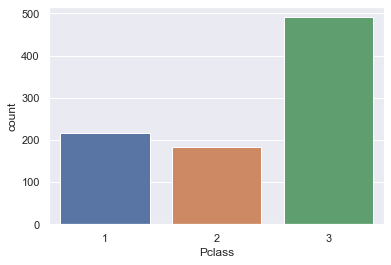

In [37]:
# 查看3个Pclass的数量, 3等舱最多, 
sns.countplot(x='Pclass', data=titanic)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

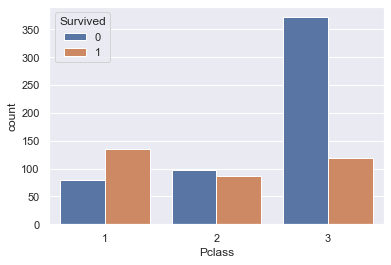

In [38]:
# 查看各个船舱生还的情况
sns.countplot(x='Pclass', data=titanic, hue='Survived')

In [39]:
# 一等舱生还概率最高,3等舱最低, 2等舱对半开
# 结合船舱和性别, 一起分析
# 想看看不同船舱等级下, 男女生还情况

Text(0.5, 1.0, 'female')

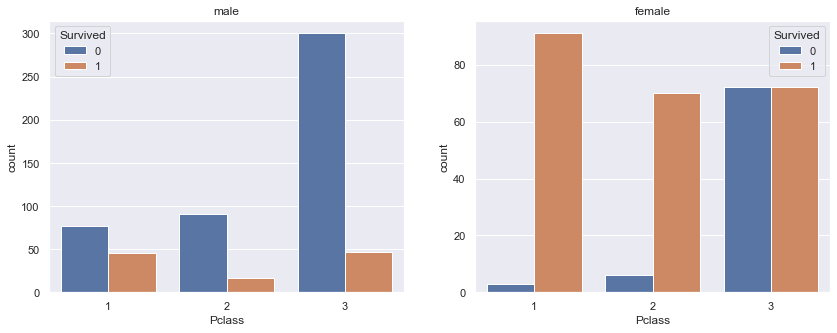

In [40]:
plt.figure(figsize=(2*7, 1*5))
axes1 = plt.subplot(1, 2, 1)
male = titanic[titanic.Sex==1]
sns.countplot(x='Pclass', data=male, hue='Survived', ax=axes1)
axes1.set_title('male')
female = titanic[titanic.Sex==0]
axes2 = plt.subplot(1, 2, 2)
sns.countplot(x='Pclass', data=female, hue='Survived', ax=axes2)
axes2.set_title('female')

In [41]:
# 头等舱的女性, 生还概率极高

In [42]:
# 查看Fare和Survived的关系
# Fare和Sex, Pclass都不一样, Fare是连续型的特征.
titanic.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

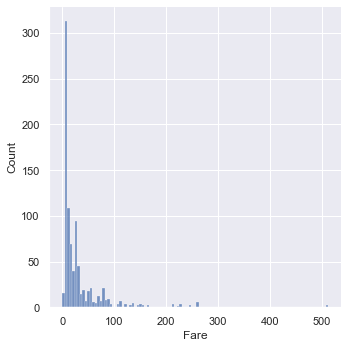

In [43]:
sns.displot(data=titanic, x='Fare')

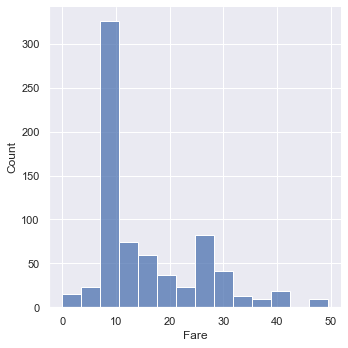

In [44]:
sns.displot(data=titanic.loc[titanic.Fare < 50], x='Fare')

In [45]:
# 对票价进行分区, 让把连续型的数据转化为离散型的数据. 可以观察出来哪个票价区间,生还的可能性比较高.
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 550]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-150', '150-200', '200-250', '250-500']
titanic['船票价格区间'] = pd.cut(titanic['Fare'], bins=bins, labels=labels)


In [46]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,船票价格区间
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,0-10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,70-80
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,0-10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,50-60
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,0-10


In [47]:
plt.rcParams['font.sans-serif'] = 'SimHei'

In [48]:
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='船票价格区间', ylabel='count'>

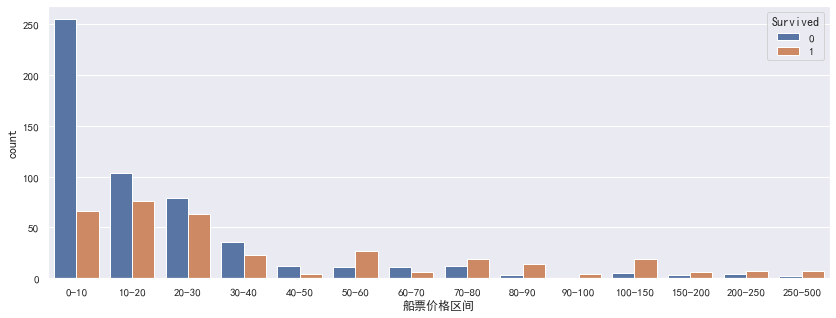

In [49]:
plt.figure(figsize=(14, 5))
sns.countplot(x='船票价格区间', data=titanic, hue='Survived')

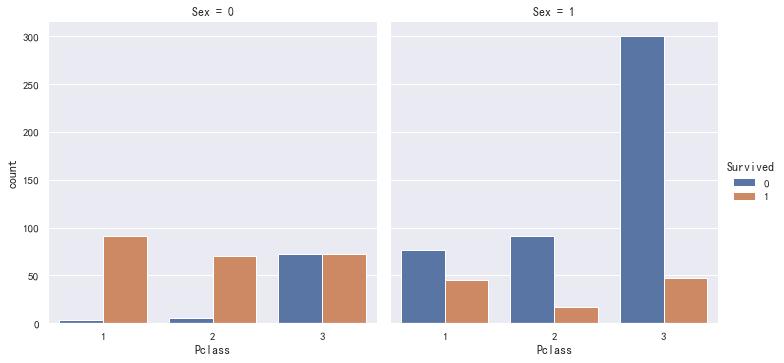

In [50]:
sns.catplot(x='Pclass', hue='Survived',  col='Sex', data=titanic, kind='count', aspect=1)

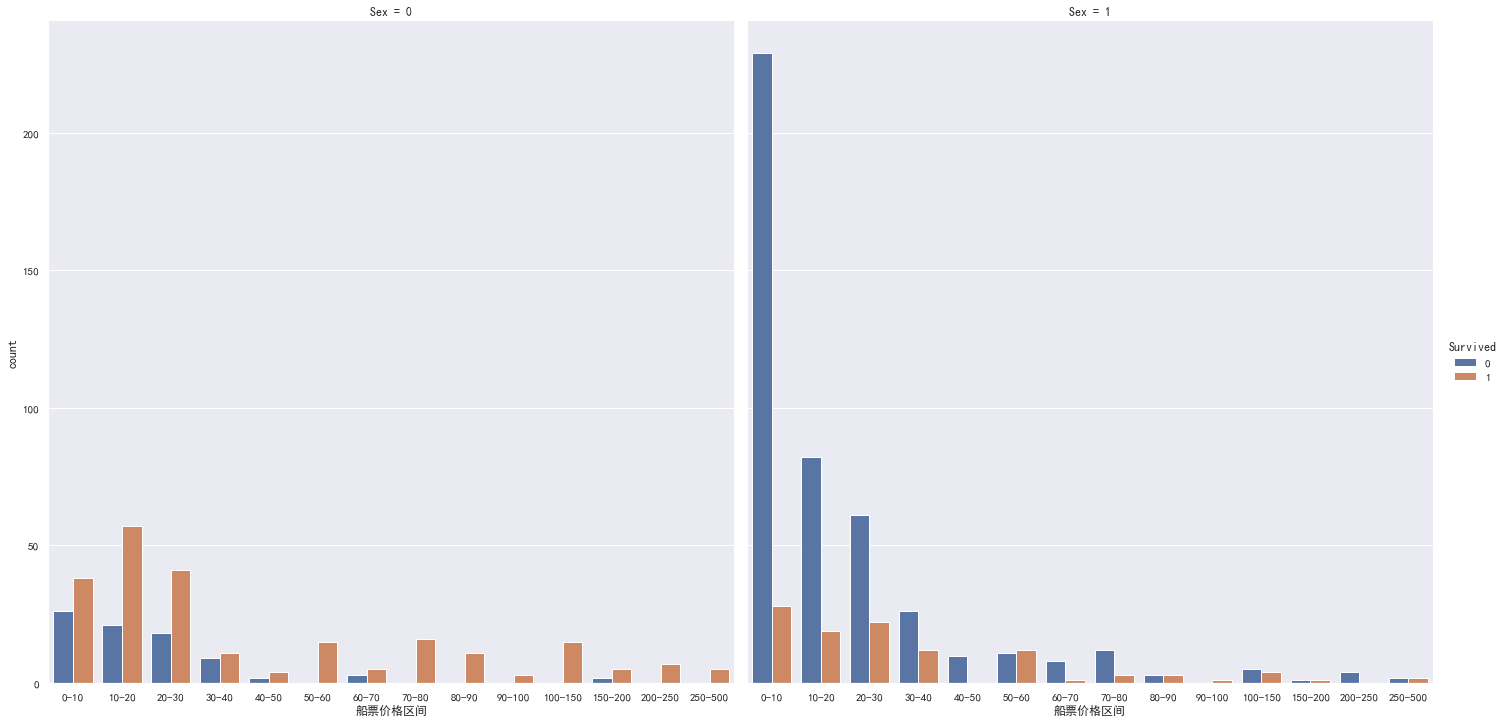

In [51]:
sns.catplot(x='船票价格区间', hue='Survived',  col='Sex', data=titanic, kind='count', aspect=1, height=10)

In [ ]:
# 对离散的特征进行one-hot编码. 独热. 哑变量
pd.get_dummies()

使用线性回归预测, 知识点:交叉验证

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

In [53]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', '船票价格区间'],
      dtype='object')

In [54]:
features = np.array(['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked'])
data = titanic[features].values.copy()
target = titanic.Survived.values

In [55]:
data

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 3.    ,  0.    , 28.    , ...,  2.    , 23.45  ,  1.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

In [56]:
target

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [57]:
skf = StratifiedKFold()

In [58]:
accs = []
for train, test in skf.split(data, target):
    # 取数据
    X_train = data[train]
    y_train = target[train]
    X_test = data[test]
    y_test = target[test]
    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    # 把线性回归预测得到的数字当成生还可能性, 数字越大, 越可能生还, 数字越小可能性越低
    y_ = linear.predict(X_test)
    # 设定阈值, >=0.5 我们就认为生还了, 把可能性转化为预测的类别
    y_pred = (y_ > 0.5)
    acc = (y_pred == y_test).mean()
    print(acc)
    accs.append(acc)

0.7877094972067039
0.8033707865168539
0.7752808988764045
0.7640449438202247
0.8146067415730337


使用逻辑斯蒂回归预测,知识点: 便捷计算交叉验证得分,cross_val_score

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [229]:
cross_val_score(LogisticRegression(max_iter=1000), data, target, cv=4).mean()

0.7878994465317335

使用随机森林预测

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
cross_val_score(RandomForestClassifier(), data, target).mean()

0.8058627832527776

使用调参后的随机森林预测

In [63]:
cross_val_score(RandomForestClassifier(max_depth=4), data, target).mean()

0.8081350825434687

In [64]:
# 试试SVC
from sklearn.svm import SVC

In [65]:
cross_val_score(SVC(), data, target).mean()

0.6734982110350888

In [66]:
from sklearn.model_selection import GridSearchCV

In [68]:
svc = SVC()
param_grid ={
    'C': [0.1, 1, 10],
    'gamma': [1/70, 1/7, 10/7],
    'kernel': ['linear', 'rbf']
}
gv = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

In [69]:
%time gv.fit(data, target)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Wall time: 3min 20s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [0.014285714285714285, 0.14285714285714285,
                                   1.4285714285714286],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [75]:
gv.best_params_

{'C': 1, 'gamma': 0.014285714285714285, 'kernel': 'linear'}

In [77]:
gv.best_score_

0.7878601468834348

In [ ]:
# 特征工程:
1.特征选择
2.特征缩放
3.特征衍生

In [78]:
# 集成的树模型, 都有一个额外的功能, 训练完成之后可以得到特征的重要性
rfc = RandomForestClassifier()
rfc.fit(data, target)

RandomForestClassifier()

In [79]:
# 特征重要性, 数字越大越重要
rfc.feature_importances_

array([0.08414063, 0.26851108, 0.25255533, 0.04895018, 0.03956744,
       0.27260575, 0.03366958])

In [80]:
features

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype='<U8')

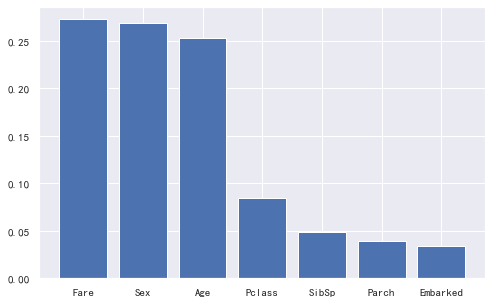

In [85]:
plt.figure(figsize=(8, 5))
plt.bar(np.arange(7), np.sort(rfc.feature_importances_)[::-1])
_ = plt.xticks(np.arange(7), features[np.argsort(rfc.feature_importances_)[::-1]])

In [93]:
features_rfc = np.array(['Fare', 'Age', 'Sex', 'Pclass'])
data_rfc = titanic[features_rfc].values.copy()
cross_val_score(LogisticRegression(max_iter=1000), data_rfc, target).mean()

0.7867553825874082

In [82]:
# boosting算法, GBDT梯度提升决策树
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gbdt = GradientBoostingClassifier()
gbdt.fit(data, target)

GradientBoostingClassifier()

In [84]:
gbdt.feature_importances_

array([0.15127941, 0.47129115, 0.12477252, 0.05639993, 0.00891045,
       0.17149911, 0.01584743])

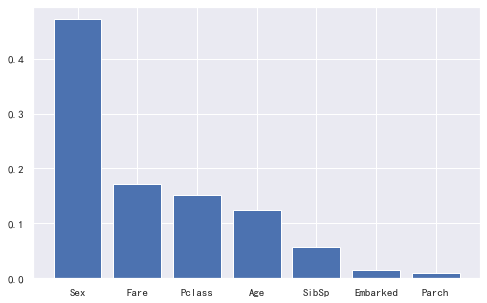

In [86]:
plt.figure(figsize=(8, 5))
plt.bar(np.arange(7), np.sort(gbdt.feature_importances_)[::-1])
_ = plt.xticks(np.arange(7), features[np.argsort(gbdt.feature_importances_)[::-1]])

In [89]:
features_gbdt = np.array(['Fare', 'Age', 'Sex', 'Pclass'])
data_gbdt = titanic[features_gbdt].values.copy()
cross_val_score(LogisticRegression(max_iter=1000), data_gbdt, target).mean()

0.7867553825874082

In [88]:
# # 对gbdt有个改进算法, XGBoost
# # 单独安装XGBoost
# !pip install xgboost -i https://pypi.douban.com/simple

Looking in indexes: https://pypi.douban.com/simple


You should consider upgrading via the 'C:\Users\ause\Desktop\Python2101\2101\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [96]:
from xgboost import XGBClassifier

In [97]:
xgb = XGBClassifier()
xgb.fit(data, target)

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
xgb.feature_importances_

array([0.20773523, 0.6147284 , 0.02997311, 0.06520434, 0.0234714 ,
       0.03368097, 0.02520655], dtype=float32)

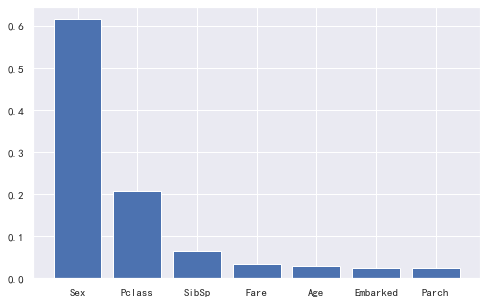

In [99]:
plt.figure(figsize=(8, 5))
plt.bar(np.arange(7), np.sort(xgb.feature_importances_)[::-1])
_ = plt.xticks(np.arange(7), features[np.argsort(xgb.feature_importances_)[::-1]])

In [94]:
# 通过统计学的方法计算特征重要性
from sklearn.feature_selection import SelectKBest

In [231]:
skb = SelectKBest(k=7)

In [232]:
skb.fit(data, target)

SelectKBest(k=7)

In [233]:
skb.scores_

array([115.03127219, 372.4057236 ,   3.76152805,   1.1105722 ,
         5.96346384,  63.03076423,  14.330525  ])

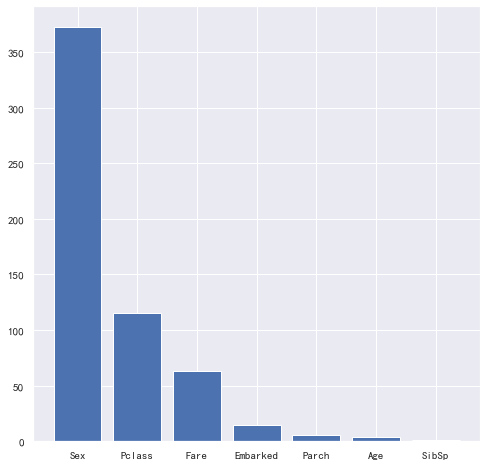

In [234]:
drow_feature_importa(features, skb.scores_)

### 2. 特征缩放

In [102]:
# 2. 特征缩放
from sklearn.preprocessing import StandardScaler

In [105]:
# (x - u) / s
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [106]:
cross_val_score(LogisticRegression(max_iter=1000), data_scaled, target).mean()

0.7833971502102819

In [107]:
cross_val_score(SVC(kernel='linear'), data_scaled, target).mean()

0.7878601468834348

In [108]:
cross_val_score(SVC(kernel='linear'), data, target).mean()

0.7878601468834348

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
cross_val_score(KNeighborsClassifier(), data, target).mean()

0.6902830958508568

In [112]:
# 标准化处理对knn影响具体:
cross_val_score(KNeighborsClassifier(), data_scaled, target).mean()

0.8125855250768941

In [ ]:
# 3. 特征衍生: 一般用于特征不多的情况, 根据已有的特征, 衍生出新的特征.

考虑人为增加特征, 增加FamilySize , NameLength, Title

In [148]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

In [115]:
titanic.Name[1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [151]:
# 名字的长度, 在一定程度上反映了身份, 根据名字的长度, 新增一个特征
titanic['NameLength'] = titanic['Name'].map(lambda name: len(name))

In [157]:
titanic.drop(columns='NameLenth', axis=1, inplace=True)

In [152]:
titanic.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [118]:
# 从有规律的字符串中提取字符串, 使用正则
import re

In [169]:
name = 'Braund, Mr. Owen Harris'
re.match(r'.*?,\s(.*?)\.\s.*', name).group(1)

'Mr'

In [176]:
# 头衔也在一定程度上反映一个人的身份, 我们可以提取名字中的头衔
titanic['Title'] = titanic['Name'].map(lambda name: re.match(r'.*?,\s(.*?)\.\s.*', name).group(1))

In [164]:
titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [178]:
# col表示上校, rev表示牧师, Mlle表示法国小姐, Major陆军少校, Sir爵士, Capt上尉, Countess女伯爵, Jonkheer无名贵族, Don阁下,尊称,Mme夫人 Dona葡萄牙语的夫人小姐
# 尽量把相同的意思的title归成一类.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "the Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

In [179]:
titanic['Title'] = titanic['Title'].map(title_mapping)

In [180]:
titanic.Title.unique()

array([ 1,  3,  2,  4,  9,  6,  5,  8,  7, 10], dtype=int64)

In [170]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', '船票价格区间', 'FamilySize', 'Title',
       'NameLength'],
      dtype='object')

使用新老特征预测

In [182]:
feature_new = np.array(['Pclass', 'Sex', 'Age',  'Fare', 'Embarked', 'FamilySize', 'NameLength', 'Title'])
data_new = titanic[feature_new]

In [183]:
cross_val_score(LogisticRegression(max_iter=1000), data_new, target).mean()

0.8047391877471597

In [185]:
cross_val_score(SVC(kernel='linear'), data_new, target).mean()

0.7833971502102819

In [187]:
cross_val_score(RandomForestClassifier(), data_new, target).mean()

0.8125792480070302

In [188]:
cross_val_score(XGBClassifier(), data_new, target).mean()

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass opti

[16:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate

[16:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate

0.8002322515849603

筛选出主要特征预测

In [189]:
xgb = XGBClassifier()
xgb.fit(data_new, target)

[16:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [190]:
xgb.feature_importances_

array([0.15248173, 0.04901608, 0.03650645, 0.04417206, 0.03374513,
       0.10650587, 0.03599139, 0.54158133], dtype=float32)

In [225]:
feature_new[np.argsort(xgb.feature_importances_)[::-1]]

array(['Title', 'Pclass', 'FamilySize', 'Sex', 'Fare', 'Age',
       'NameLength', 'Embarked'], dtype='<U10')

In [219]:
def drow_feature_importa(features, feature_importances):
    plt.figure(figsize=(8, 8))
    plt.bar(np.arange(len(feature_importances)), np.sort(feature_importances)[::-1])
    plt.xticks(ticks=np.arange(len(feature_importances)), labels=features[np.argsort(feature_importances)[::-1]])

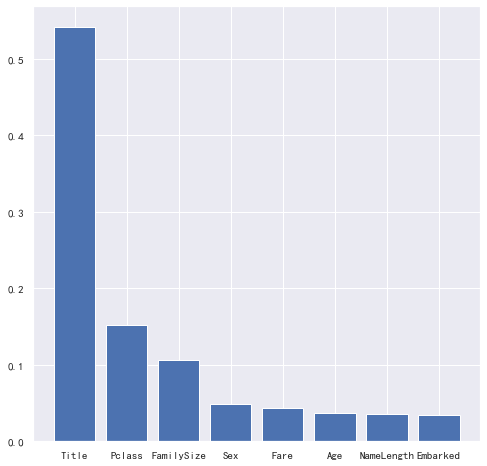

In [220]:
drow_feature_importa(feature_new, xgb.feature_importances_)

In [226]:
features_new_xgb = np.array(['Title', 'Pclass', 'FamilySize', 'Sex'])
data_new_xgb = data_new[features_new_xgb]

In [227]:
cross_val_score(XGBClassifier(), data_new_xgb, target).mean()

c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass opti

[17:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass opti

[17:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ause\desktop\python2101\2101\env\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


0.8058690603226413